In [1]:
import os
import numpy as np
import pandas as pd
import time
import json
import requests
from Bio import SeqIO
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'mono', fontsize = 20, colors = 'banskt', dpi = 300)


In [2]:
### Load sequences and annotations for disprot

def get_sequences(fastadir=None, fastafile=None):
    sequences = []
    if fastadir is None and fastafile is None:
        print("No fasta dir or file")
        raise
    if fastadir is not None and fastafile is not None:
        print("Choose one, fasta dir or multi fasta filr")
        raise
    # check for a directory with individual fasta files
    # or a multi fasta file
    if fastadir is not None:
        fastafiles = os.listdir(fastadir)
        for f in fastafiles:
            counter = 0
            for record in SeqIO.parse(os.path.join(fastadir, f), "fasta"):
                sequences.append(record)
                counter += 1
                if counter > 1:
                    print("More than one fasta record?", f)
                    raise
    elif fastafile is not None:
        for record in SeqIO.parse(fastafile, "fasta"):
            sequences.append(record)
    return sequences

# Monomer
fastafile = "../datasets/disprot/monomers.fasta"
counter = 0

# find annotation for each sequence
annotfile = "../datasets/disprot/monomers_annot.fasta" 
annotdir  = None
annots    = get_sequences(fastadir=annotdir, fastafile=annotfile)
sequences = get_sequences(fastadir=None, fastafile=fastafile)

In [3]:
### Make sure seq and annotations length match, and embed test proteins
annot_dict = dict()
for record in annots:
    if "|" in record.name:
        name = record.name.split("|")[1].strip()
    else:
        name = record.name.split()[0].strip()
        if name == "":
            print("Name is empty",record.name)
    annot_dict[name] = str(record.seq)
    
msequences  = list()
mannots     = list()
uniprots    = list()
counter = 0
maxlen = 1022
for s in sequences:
    if "|" in s.name:
        uniprot_id = s.name.split("|")[1].strip()
    else:
        uniprot_id = s.name.split()[0].strip()
    print(uniprot_id)
    aa_sequence = str(s.seq).upper()
    if len(aa_sequence) == len(annot_dict[uniprot_id]):
        if len(aa_sequence) <= maxlen:
            uniprots.append(uniprot_id)
            msequences.append(aa_sequence)
            mannots.append(annot_dict[uniprot_id])
            counter += 1
        else:
            print(f"Seq length is {len(aa_sequence)} > {maxlen}")
    else:
        print("Seq length and annot do not match")
        print(len(annot_dict[uniprot_id]), uniprot_id, len(aa_sequence))
print(f"Loaded {counter} proteins")

1AE9A
1AH7A
1AHOA
1AOCA
1AOLA
1AQZA
1ATGA
1ATZA
1AYOB
1AZOA
1B9WA
1BKRA
1BM8A
1BQUA
1BTEA
1BXOA
1BXYB
1C1KA
1C7KA
1CC8A
1CHDA
1CJWA
1CTFA
1CV8A
1CY5A
1D0QA
1D2OA
1D2SA
1D4OA
1DD9A
1DMGA
1DQGA
1DS1A
1DVOA
1DYPA
1DZFA
1E2WA
1E5KA
1EB6A
1EDMB
1EFDN
1EJ8A
1ELKA
1EOKA
1EQ2A
1ES5A
1EW4A
1EZ3A
1F32A
1F46A
1F9VA
1FC3A
1FCQA
1FCYA
1FO8A
1FPZA
1FT5A
1FVIA
1G12A
1G2RA
1G61A
1G66A
1G8AA
1GAKA
1GCIA
1GMIA
1GMXA
1GNYA
1GPPA
1GS9A
1GUIA
1GWMA
1GXMA
1GXYA
1H4XA
1H8PB
1HDOA
1HH8A
1HRUA
1HTWA
1HXIA
1HXNA
1HXRA
1HYPA
1I1WA
1I27A
1I2TA
1I4JA
1I58A
1I8AA
1IAPA
1ID0A
1IFRA
1II5A
1IIBA
1IKTA
1IN4A
1IO0A
1IQ4A
1IQZA
1ISUA
1IT2A
1IXGA
1J0PA
1J1TA
1J3AA
1J77A
1J7XA
1J83A
1J8EA
1JB3A
1JBEA
1JE5A
1JF3A
1JG1A
1JHJA
1JHSA
1JM1A
1JMKC
1JO0B
1JOSA
1JR2A
1JUVA
1JX6A
1JYHA
1JYKA
1K4NA
1K5CA
1K6KA
1K7CA
1K7JA
1KAFA
1KHYA
1KMTA
1KNGA
1KOEA
1KP6A
1KPTA
1KQ6A
1KT6A
1KU3A
1KXOA
1KZFA
1L3KA
1L9LA
1L9XA
1LC0A
1LFPA
1LKIA
1LS1A
1LSLA
1LU4A
1LUZA
1LWBA
1M1HA
1M1QA
1M2XA
1M4LA
1M55A
1M6YA
1M9ZA
1MAIA
1MBAA
1MC2A
1MGTA
1MJ5A
1MJN

In [6]:
## Write fasta files for the dataset
with open("monomer_OK_fullset.fasta", 'w') as outstrm:
    for i, uniprot_id in enumerate(uniprots):
        outstrm.write(f">{uniprot_id}\n{msequences[i]}\n")

with open("monomer_OK_fullset_annotations.fasta", 'w') as outstrm:
    for i, uniprot_id in enumerate(uniprots):
        outstrm.write(f">{uniprot_id}\n{mannots[i]}\n")

In [7]:
with open("monomer_OK_fullset.uniprot_ids.txt", 'w') as outstrm:
    for u in uniprots:
        outstrm.write(f"{u}\n")

In [8]:
len(uniprots)

3042

In [9]:
###### CANNOT DOWNLOAD AF for PDB IDs! need uniprot ID
###### Just download PDBs

## Download AlphaFold2 models for target uniprots from disprot

if not os.path.exists("AF_monomer"):
    os.makedirs("AF_monomer")
    
success_unipids = list()
failed_unipids = list()
for unip in uniprots:
    file = f"./AF_monomer/AF-{unip}-F1-model_v4.cif"
    if not os.path.exists(file):
        fileurl = f"https://alphafold.ebi.ac.uk/files/AF-{unip}-F1-model_v4.cif"
        #print(fileurl)
        #print(f"wget -O {file} {fileurl}")
        # # try:
        res = requests.get(f"https://alphafold.ebi.ac.uk/files/AF-{unip}-F1-model_v4.cif")
        if res.status_code == 200:
            print(unip)
            with open(file, 'w') as outfmt:
                outfmt.write(res.content.decode())
                success_unipids.append(unip)
        else:
            print(f"Failed to get AF2 model for {unip}")
            print(res)
            failed_unipids.append(unip)
    else:
        print(f"File exists: {unip}")
        success_unipids.append(unip)

Failed to get AF2 model for 1AE9A
<Response [404]>
Failed to get AF2 model for 1AH7A
<Response [404]>
Failed to get AF2 model for 1AHOA
<Response [404]>
Failed to get AF2 model for 1AOCA
<Response [404]>
Failed to get AF2 model for 1AOLA
<Response [404]>
Failed to get AF2 model for 1AQZA
<Response [404]>
Failed to get AF2 model for 1ATGA
<Response [404]>
Failed to get AF2 model for 1ATZA
<Response [404]>
Failed to get AF2 model for 1AYOB
<Response [404]>
Failed to get AF2 model for 1AZOA
<Response [404]>
Failed to get AF2 model for 1B9WA
<Response [404]>
Failed to get AF2 model for 1BKRA
<Response [404]>
Failed to get AF2 model for 1BM8A
<Response [404]>
Failed to get AF2 model for 1BQUA
<Response [404]>
Failed to get AF2 model for 1BTEA
<Response [404]>
Failed to get AF2 model for 1BXOA
<Response [404]>
Failed to get AF2 model for 1BXYB
<Response [404]>
Failed to get AF2 model for 1C1KA
<Response [404]>
Failed to get AF2 model for 1C7KA
<Response [404]>
Failed to get AF2 model for 1CC

KeyboardInterrupt: 

In [ ]:
print(len(success_unipids))
print(len(failed_unipids))

In [14]:
from Bio.PDB.MMCIF2Dict import MMCIF2Dict

def parse_AF_CIF(file):
    # read in the CIF file.
    # file = "./AF/AF-P02686-F1-model_v4.cif"
    pdb_info = MMCIF2Dict(file)

    seq = pdb_info["_entity_poly.pdbx_seq_one_letter_code"][0].replace("\n", "")

    pLDDT_seq = pdb_info['_ma_qa_metric_local.label_seq_id']
    pLDDT = pdb_info['_ma_qa_metric_local.metric_value']

    dssp_type = pdb_info['_struct_conf.conf_type_id']
    dssp_beg  = pdb_info['_struct_conf.beg_label_seq_id']
    dssp_end  = pdb_info['_struct_conf.end_label_seq_id']
    
    seq_placeholder = ["-" for i in range(len(seq))]
    for i in range(len(dssp_type)):
        if dssp_type[i].startswith("HELX"):
            letter = "H"
            beg = int(dssp_beg[i])
            end = int(dssp_end[i])
            for j in range(beg-1, end):
                seq_placeholder[j] = letter
        if dssp_type[i].startswith("STRN"):
            letter = "B"
            beg = int(dssp_beg[i])
            end = int(dssp_end[i])
            for j in range(beg-1, end):
                seq_placeholder[j] = letter
    if len(seq) == len(pLDDT) and len(seq) == len(seq_placeholder):
        return seq, pLDDT, seq_placeholder
    else:
        raise

In [16]:
AF_dict = dict()

fails = list()
for i, unip in enumerate(success_unipids):
    file = f"./AF/AF-{unip}-F1-model_v4.cif"
    if os.path.exists(file):
        seq, pLDDT, dssp = parse_AF_CIF(file)
        AF_dict[unip] = dict()
        AF_dict[unip]["seq"] = seq
        AF_dict[unip]["pLDDT"] = pLDDT
        AF_dict[unip]["disorder"] = mannots[uniprots.index(unip)]
        AF_dict[unip]["ss"] = dssp
        if AF_dict[unip]["seq"] == msequences[uniprots.index(unip)]:
            if len(AF_dict[unip]["disorder"]) == len(AF_dict[unip]['seq']):
                print("OK", end=" ")
            else:
                print("FAIL", end=" ")
                fails.append(unip)
    else:
        print(f"\nNO FILE {unip}")

OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK O

In [17]:
x = list()
cat = list()
for unip in AF_dict:
    x = x + AF_dict[unip]["pLDDT"]
    cat = cat + AF_dict[unip]["ss"]

In [18]:
x = np.array([float(i) for i in x])

In [19]:
ix_NA = [i for i in range(len(cat)) if cat[i] == "-"]
ix_H = [i for i in range(len(cat)) if cat[i] == "H"]
ix_B = [i for i in range(len(cat)) if cat[i] == "B"]

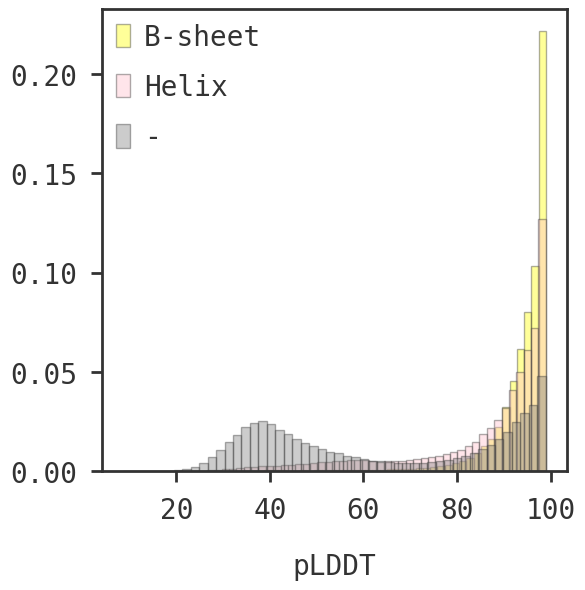

In [23]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(111)
ax.hist(x[ix_B], bins=50, density=True, label="B-sheet", alpha=0.4, color='yellow')
ax.hist(x[ix_H], bins=50, density=True, label="Helix", alpha=0.4, color="pink")
ax.hist(x[ix_NA], bins=50, density=True, label="-", alpha=0.4, color='gray')
ax.set_xlabel("pLDDT")
ax.legend()
plt.show()

In [21]:
with open("AF2_OK_fullDisprot.json", 'w') as outfmt:
    json.dump(AF_dict, outfmt)
